# 1.0 General
## 1.1 Project Information
**Project Number:** 15M-00685-13  
**Project Name:** New Champlain Bridge Corridor Project  
**Project Details:**  NCR pending (Formwork displaced for P6A) Axis 1 Diaphragm)  
**Project Initiation Date:** June 19th, 2015  
**Engineer:** MG  
**Checker:**  

## 1.2 Calculation Description
When pouring the end diaphragm at Axis 1 of P6A, the formwork displaced so that the step for the approach slab is not above reinforcement.  But it is possible that the concrete has sufficient resistance even without
reinforcement in this area.

## 1.3 References
References (§, Fig., Tab.) are to CAN/CSA-S6-06 and CAN/CSA-S6.1-06 unless noted otherwise.

## 1.4 Assumptions:
1. Cracks are straight, starting at a distance $a$ from the free edge and
   occurring at an angle $θ$ relative to vertical.
2. Horizontal force pulling the approach slab away from the end diaphragm is
   resisted by the reinforcing dowels.
![Image of end diaphragm](images/Approach-slab-seat.svg)

# 2.0 Setup

In [2]:
from math import pi, sqrt, sin, cos
import numpy as np
import matplotlib.pyplot as plt
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

In [3]:
%load_ext watermark
%watermark -n -v -m -g -iv

numpy 1.16.2
Fri May 29 2020 

CPython 3.7.3
IPython 5.8.0

compiler   : GCC 8.3.0
system     : Linux
release    : 4.19.0-8-amd64
machine    : x86_64
processor  : 
CPU cores  : 2
interpreter: 64bit
Git hash   :


In [4]:
%load_ext physics

Unit calculation and physics extensions activated.


# 3.0 Inputs
## 3.1 Load Factors

In [5]:
α_L = 1.70                          # Tab. 3.1
α_D2 = 1.25
α_D3 = 1.50

## 3.2 Material Properties

In [6]:
ϕ_c = 0.75                      # GREEK PHI SYMBOL ϕ, not Φ or φ
fprime_c = 25 MPa
rho_c = 2400 kg/m^3
γ_c = (25 kN/m^3)
γ_asphalt = (23.5 kN/m^3)
c = 1.00 MPa
μ = 1.40

## 3.3 Applied Loading

In [7]:
P_wheel = (87.5 kN)                 # load of one wheel Fig. 3.2
DLA = 0.50                          # §3.8.4.5.3
P_f = α_L * P_wheel * (1 + DLA) ; print('The factored wheel load is %s' % P_f)
q_fL =  P_f / ( (600 mm) + 2 * (250 mm))
q_fD = ( α_D2 * 0.5 * (6 m) * (0.25 m) * γ_c
        + α_D3 * 0.5 * Q(6, 'm') * Q(0.05, 'm') * γ_asphalt )
q_f = q_fL + q_fD
q_f.convert('kN/m') ; print('The vertical shear is %s' % q_f)

The factored wheel load is 223.125 kN
The vertical shear is 231.56591 kN/m


# 4.0 ULS
## 4.1 Force Over Crack

In [8]:
def v_f(a, θ, q_f):
    cracklength = a / np.sin(θ)
    shearstress = q_f * np.cos(θ) / cracklength
    shearstress.convert('MPa')
    return shearstress

print('Factored shear stress on the crack is %s' % v_f((100 mm), pi / 4.0, q_f))

Factored shear stress on the crack is 1.1578295 MPa


## 4.2 Unit Shear Resistance

In [9]:
def shearfriction(σ):
    shearfriction_1 = ϕ_c * (c + μ * σ)
    # if shearfriction_1.value < 6.5 :
    #     shearfriction = shearfriction_1
    # else:
    #     shearfriction = (6.5 MPa)
    shearfriction = shearfriction_1
    return shearfriction

## 4.3 Resistance Over Crack

In [10]:
def v_r(a, θ, q_f):
    cracklength = a / np.sin(θ)
    normalstress = q_f * np.sin(θ) / cracklength
    shearresistance = shearfriction(normalstress)
    return shearresistance

print('Resistance to shear stress on the crack is %s' % v_r((100 mm), pi / 4.0, q_f))

Resistance to shear stress on the crack is 1.965721 MPa


# 5.0 Results

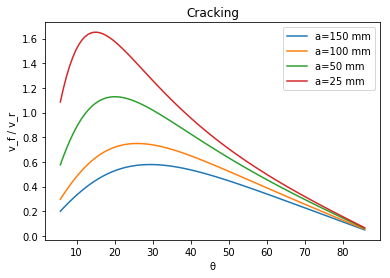

In [12]:
θ = np.linspace(0.1, pi/2.1, 100)

plt.plot(np.degrees(θ), v_f((150 mm), θ, q_f) / v_r((150 mm), θ, q_f), label='a=150 mm')
plt.plot(np.degrees(θ), v_f((100 mm), θ, q_f) / v_r((100 mm), θ, q_f), label='a=100 mm')
plt.plot(np.degrees(θ), v_f((50 mm), θ, q_f) / v_r((50 mm), θ, q_f), label='a=50 mm')
plt.plot(np.degrees(θ), v_f((25 mm), θ, q_f) / v_r((25 mm), θ, q_f), label='a=25 mm')

plt.xlabel('θ')
plt.ylabel('v_f / v_r')
plt.title("Cracking")

plt.legend()
plt.show()

# 6.0 Conclusions

The applied load will likely break off the edge of the step that supports the approach slab, at about 50 mm from the edge, and at an angle of 20° from vertical; however, in order for the approach slab to be
unsupported, it would have to break off at 150 mm from
the edge, for which there is more than enough esistance.

The step for the approach slab is acceptable even though it is not above reinforced concrete.